# Introduction to financial technical analysis

# 📌 Objectives

By the end of this notebook, students will be able to:

1. **Access and Manipulate Financial Data:**
   - Use the `yfinance` library to retrieve historical stock prices for all companies in the S&P 500 index.

2. **Compute Key Technical Indicators:**
   - Calculate 50-day and 200-day moving averages for each stock in the index.

3. **Detect Trading Signals:**
   - Identify Golden Crosses and Death Crosses as described in technical analysis literature.

4. **Analyze Recent Market Behavior:**
   - Isolate and examine stocks that experienced technical signals (crosses) in the last 14 days.

5. **Visualize Price Trends and Volatility:**
   - Plot historical price movements along with moving averages, and compute volatility around signal dates.

6. **Interpret Technical Indicators in Context:**
   - Reflect on what Golden and Death Crosses signify and how traders may respond to them.

7. **Evaluate Strategy Viability:**
   - Discuss the strengths and limitations of using moving averages as a standalone trading strategy.

8. **Connect Technical Analysis to Broader Market Intelligence:**
   - Explore how sentiment analysis and news (covered in later sections) could complement technical signals.

9. **Develop Critical Thinking About Signal Reliability:**
   - Assess potential risks of false positives and propose improvements or filters to enhance signal accuracy.

10. **Engage in Strategic Reflection:**
    - Answer analytical questions aimed at understanding the utility, risks, and presentation of the strategy to a professional audience.


## Import and install librairies

In [1]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import numpy as np

## Get the list of stocks in the S&P 500 

In [2]:
# Read and print the stock tickers that make up S&P500
df_tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
print(df_tickers.head())

  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  


In [3]:
display(df_tickers)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [4]:
ticker_list = df_tickers['Symbol'].tolist()

## Get the closing price of all 500 stocks in the S&P 500 Index
Use the yfinance library to retrieve the close price of all 500 stocks in the index between 2024-05-01 and 2025-05-01
https://ranaroussi.github.io/yfinance/reference/yfinance.stock.html

In [5]:
start_date = '2024-05-01'
end_date = '2025-05-01'

In [6]:
# CODE HERE
# Use as many coding cells as you need

# Load closing prices 
# Make sure you end this coding section by displaying your results: display(df_close)

#Clean the ticker list (replace '.' with '-' for compatibility)
ticker_list = df_tickers['Symbol'].str.replace('.', '-', regex=False).tolist()

# Download data (closing prices only)
df_close = yf.download(ticker_list, start=start_date, end=end_date, auto_adjust=True)['Close']

#Display results
display(df_close)

[*********************100%***********************]  502 of 503 completed

2 Failed downloads:
[*********************100%***********************]  502 of 503 completed['FTNT', 'TXT']: Timeout('Failed to perform, curl: (28) Connection timed out after 10001 milliseconds. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,137.376266,168.283661,154.714767,156.160004,103.735458,91.096085,293.442139,469.390015,189.859955,55.668907,...,29.172792,91.453217,51.484386,111.217087,129.094406,66.839996,132.078354,118.202553,309.049988,156.223282
2024-05-02,136.217361,171.991287,153.844193,158.330002,103.374344,90.497009,295.092743,476.570007,192.405899,56.603561,...,29.955240,93.958229,51.493961,111.418373,134.052750,70.300003,131.824615,117.115044,312.709991,164.827881
2024-05-03,138.129074,182.279160,156.695099,159.710007,103.354828,89.774330,298.403900,486.179993,195.480637,56.431889,...,30.032516,95.378410,51.934322,111.188332,135.255386,69.470001,131.112137,120.278717,309.589996,164.670212
2024-05-06,139.278091,180.619171,155.681030,162.000000,103.101067,92.370285,300.712860,493.589996,199.093933,57.404686,...,30.022860,96.522438,52.039631,111.907219,137.217026,73.529999,132.907913,119.191200,315.790009,163.566284
2024-05-07,139.931839,181.305023,155.508835,159.809998,103.618340,93.387741,305.232483,492.269989,199.338745,58.739899,...,29.800682,95.891251,52.671459,111.351280,138.035202,71.599998,132.644409,120.051323,317.869995,166.030365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,106.795090,208.097107,178.825470,121.709999,128.801849,92.099998,291.410004,360.910004,194.345154,48.284031,...,25.294355,81.371361,69.709930,107.638626,115.241966,57.500000,146.859604,101.237473,244.080002,151.792435
2025-04-25,106.056648,209.005920,184.466751,122.510002,128.274216,90.680000,293.390015,367.720001,193.708054,47.759418,...,24.609919,81.900002,68.430580,107.579178,115.730400,58.090000,146.580978,101.247452,246.240005,152.958542
2025-04-28,106.645409,209.864792,190.692963,123.300003,128.951172,91.190002,293.250000,368.619995,192.841995,47.561451,...,25.363791,81.989769,69.005791,107.638626,115.550972,58.320000,147.028778,101.496803,243.490005,153.058212


## Identify Golden and Death Crosses

### Get Moving Averages 50 days and 200 days

In [7]:
# CODE HERE
# Use as many coding cells as you need

# Compute moving averages
# Make sure you end this coding section by displaying your results: display(df_ma50), display(df_ma200)
# Compute 50-day moving average
df_ma50 = df_close.rolling(window=50).mean()

# Compute 200-day moving average
df_ma200 = df_close.rolling(window=200).mean()

# Display results
display(df_ma50)
display(df_ma200)


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,118.589774,219.229514,194.882048,128.497001,129.695852,91.7206,322.755805,401.392800,204.386194,46.354729,...,28.290147,82.616266,68.725403,109.007224,120.092335,60.865000,151.386326,105.303733,277.851799,158.931158
2025-04-25,117.960953,218.678437,194.779480,128.136801,129.675178,91.7690,320.885378,399.492000,204.194042,46.424616,...,28.199398,82.695181,68.768236,109.031401,119.825021,60.367001,151.415763,105.358225,275.718199,158.535975
2025-04-28,117.376369,218.051459,194.792594,127.782001,129.642279,91.7896,318.998219,397.680000,203.901113,46.480951,...,28.121558,82.734114,68.802902,109.041310,119.530667,59.847600,151.409784,105.399390,274.119598,158.320589


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,133.080366,227.101211,183.261852,130.701575,116.973860,96.197872,340.475851,478.509449,214.892000,52.358255,...,29.730782,85.165791,64.041626,111.437774,125.549299,72.28710,136.723923,106.728763,346.199799,172.881445
2025-04-25,132.988337,227.008163,183.380333,130.551875,117.119245,96.185332,340.478539,477.517949,214.720084,52.293548,...,29.719768,85.156247,64.130068,111.439660,125.467794,72.25500,136.835707,106.711042,345.854800,172.787551
2025-04-28,132.891064,226.898010,183.529514,130.409175,117.261134,96.177719,340.493397,476.538299,214.512771,52.222563,...,29.712475,85.151355,64.220807,111.437109,125.371802,72.22490,136.937422,106.688921,345.453200,172.697852


### Detecting Golden and Death Crosses in the last 14 days

In [8]:
# CODE HERE
# Use as many coding cells as you need

# define a function that detects golden and death crosses in the last 14 days for all stocks
# Define function to detect golden/death crosses
def detect_crosses(ma_short, ma_long, days=14):
    """
    Detects Golden and Death Crosses for all tickers in the last `days` rows.
    
    Parameters:
    - ma_short: DataFrame with short-term moving averages (e.g., 50-day MA)
    - ma_long: DataFrame with long-term moving averages (e.g., 200-day MA)
    - days: Number of most recent days to check for crossover signals
    
    Returns:
    - DataFrame with rows (Ticker, Date, Signal) where Signal is 'Golden Cross' or 'Death Cross'
    """
    crosses = []

    for ticker in ma_short.columns:
        try:
            # Combine the short and long moving averages into one DataFrame
            combined = pd.DataFrame({
                'ma_short': ma_short[ticker],
                'ma_long': ma_long[ticker]
            }).dropna()  # Drop rows where either MA is missing

            # If not enough data, skip this ticker
            if len(combined) < days:
                continue

            # Keep only the most recent `days` rows
            recent = combined.tail(days)

            # Compute the difference between MAs and their sign
            diff = recent['ma_short'] - recent['ma_long']
            sign = diff.apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

            # Detect changes in sign (crossovers)
            cross = sign.diff()

            # Iterate over dates and detect type of crossover
            for i in cross.index:
                if cross.loc[i] == 2:
                    # Golden Cross: MA50 crosses above MA200
                    crosses.append((ticker, i, "Golden Cross"))
                elif cross.loc[i] == -2:
                    # Death Cross: MA50 crosses below MA200
                    crosses.append((ticker, i, "Death Cross"))

        except Exception as e:
            # Handle any errors and continue with next ticker
            print(f"Error processing {ticker}: {e}")
            continue

    # Return results as DataFrame
    return pd.DataFrame(crosses, columns=["Ticker", "Date", "Signal"])


# Detect crosses in last 14 days
df_crosses = detect_crosses(df_ma50, df_ma200, days=14)

# Display results
display(df_crosses)



,Ticker,Date,Signal
0,ADSK,2025-04-11,Death Cross
1,AME,2025-04-22,Death Cross
2,AMP,2025-04-24,Death Cross
3,AMT,2025-04-21,Golden Cross
4,AMZN,2025-04-22,Death Cross
...,...,...,...
63,UNP,2025-04-16,Death Cross
64,VST,2025-04-30,Death Cross
65,WAB,2025-04-21,Death Cross
66,WAT,2025-04-28,Death Cross


In [9]:
# use the display function to show as many intermediary results
# for example display(df_golden_cross_14d)
df_golden_cross_14d = df_crosses[df_crosses['Signal'] == 'Golden Cross']
display(df_golden_cross_14d)

,Ticker,Date,Signal
3,AMT,2025-04-21,Golden Cross
13,CI,2025-04-30,Golden Cross
23,EW,2025-04-17,Golden Cross
31,INVH,2025-04-30,Golden Cross
34,KDP,2025-04-21,Golden Cross
41,MDLZ,2025-04-28,Golden Cross
43,MOH,2025-04-28,Golden Cross
45,NEM,2025-04-14,Golden Cross
52,SBAC,2025-04-29,Golden Cross
53,SJM,2025-04-25,Golden Cross


In [10]:
# use the display function to show as many intermediary results
# for example display(df_death_cross_14d)
df_death_cross_14d = df_crosses[df_crosses['Signal'] == 'Death Cross']
display(df_death_cross_14d)

,Ticker,Date,Signal
0,ADSK,2025-04-11,Death Cross
1,AME,2025-04-22,Death Cross
2,AMP,2025-04-24,Death Cross
4,AMZN,2025-04-22,Death Cross
5,APD,2025-04-21,Death Cross
6,APO,2025-04-17,Death Cross
7,AXP,2025-04-22,Death Cross
8,BAC,2025-04-16,Death Cross
9,BLK,2025-04-16,Death Cross
10,CCL,2025-04-22,Death Cross


#### Golden crosses
List the first top companies in alphabetical order (by there symbol or ticker) that had a golden cross in the last 14 days:

YOUR WRITTEN RESPONSE HERE

In [12]:
# Sort Golden Crosses alphabetically by ticker symbol
df_golden_sorted = df_golden_cross_14d.sort_values(by='Ticker')

# Display only the first few results
display(df_golden_sorted.head(5))


,Ticker,Date,Signal
3,AMT,2025-04-21,Golden Cross
13,CI,2025-04-30,Golden Cross
23,EW,2025-04-17,Golden Cross
31,INVH,2025-04-30,Golden Cross
34,KDP,2025-04-21,Golden Cross


#### Death crosses
List the first 10 companies in alphabetical order (by there symbol or ticker) that had a death cross in the last 14 days: 

YOUR WRITTEN RESPONSE HERE

In [14]:
# Drop duplicate tickers, keep the first (most recent Death Cross per ticker)
df_death_unique = df_death_cross_14d.sort_values(by='Ticker').drop_duplicates(subset='Ticker')

# Display the first 10 alphabetically
display(df_death_unique.head(10))



,Ticker,Date,Signal
0,ADSK,2025-04-11,Death Cross
1,AME,2025-04-22,Death Cross
2,AMP,2025-04-24,Death Cross
4,AMZN,2025-04-22,Death Cross
5,APD,2025-04-21,Death Cross
6,APO,2025-04-17,Death Cross
7,AXP,2025-04-22,Death Cross
8,BAC,2025-04-16,Death Cross
9,BLK,2025-04-16,Death Cross
10,CCL,2025-04-22,Death Cross


### Visualization of the results
(in alphabetical order)

#### Compute the volatility of every stock and print it in the title of each plot 

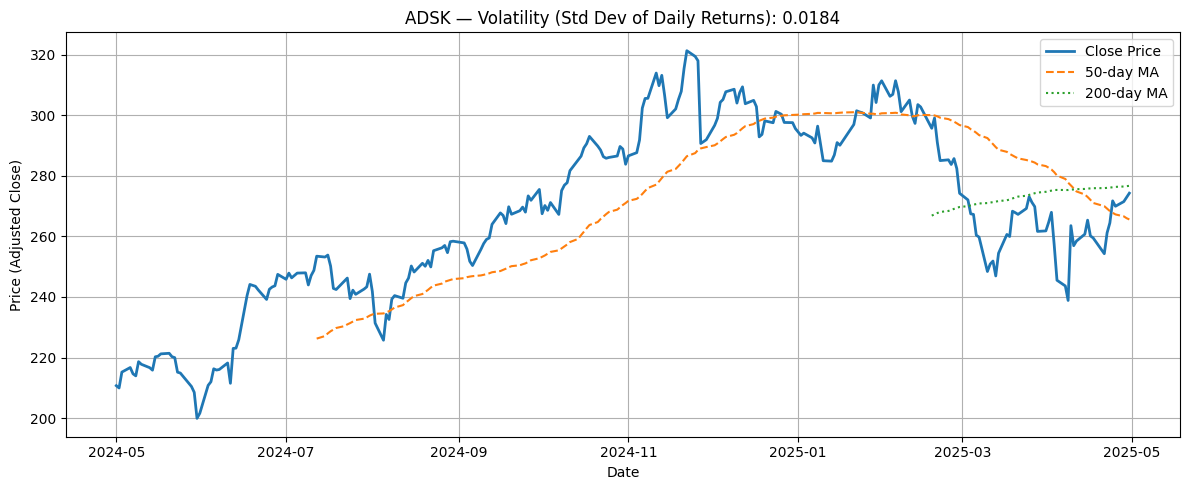

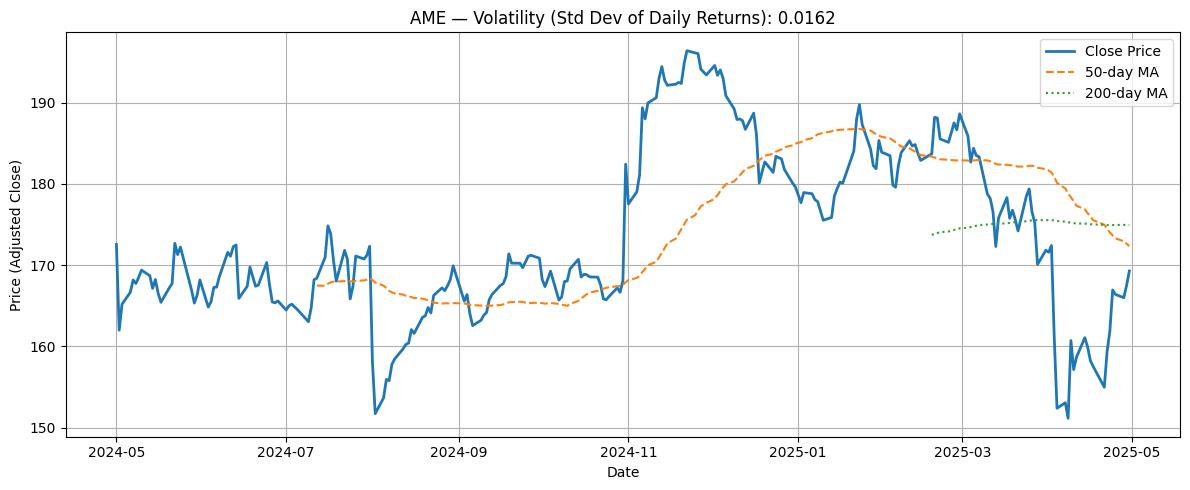

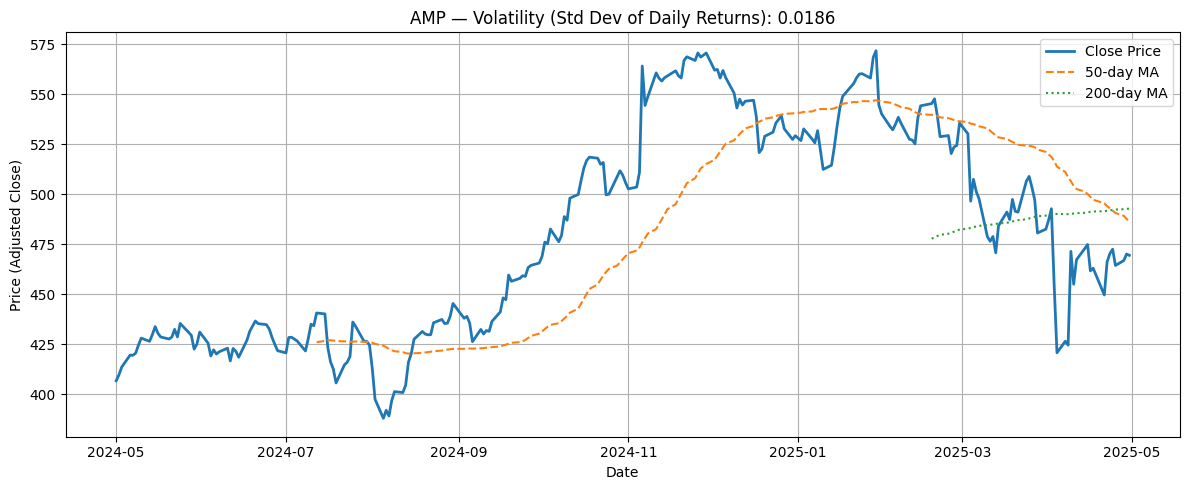

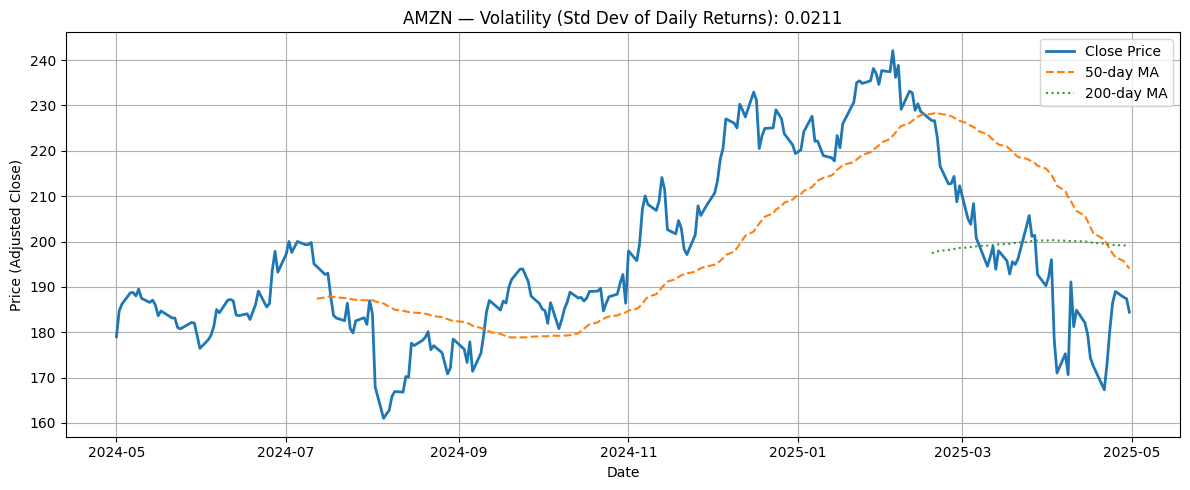

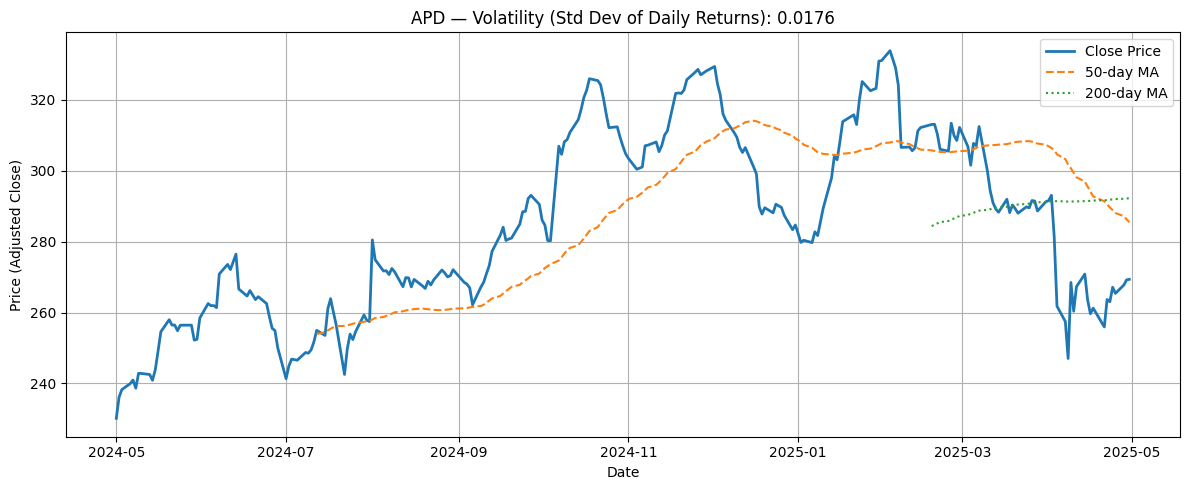

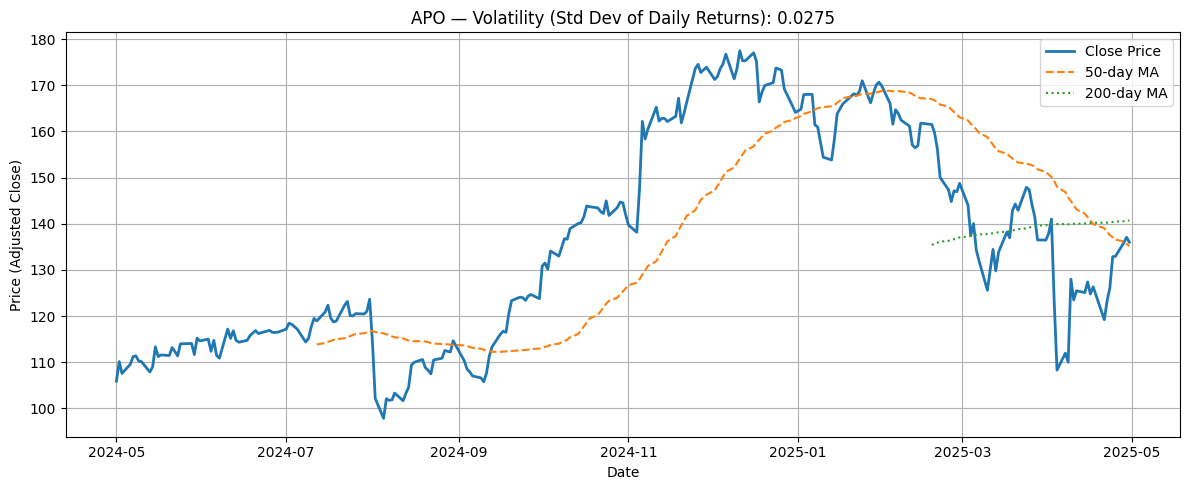

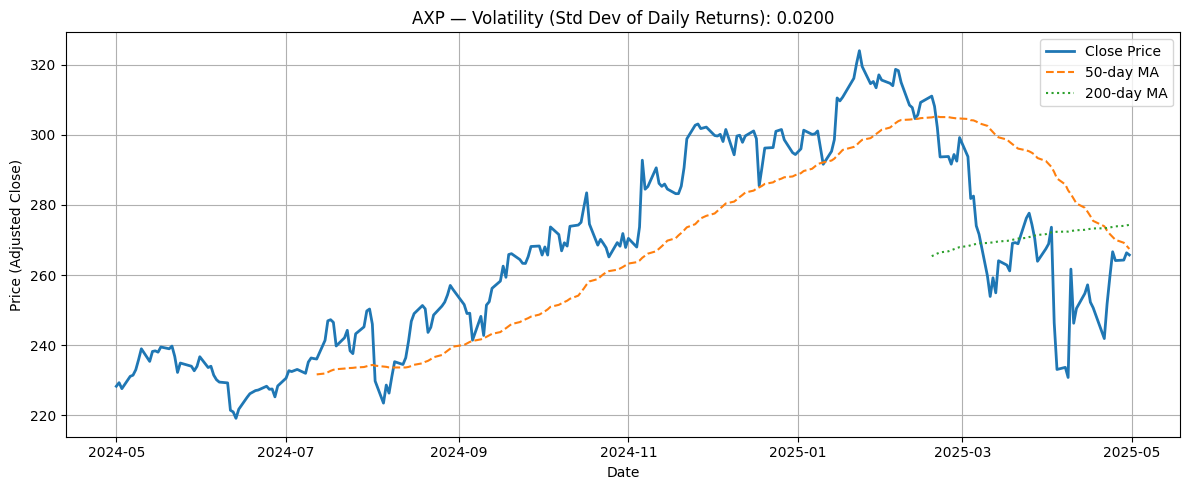

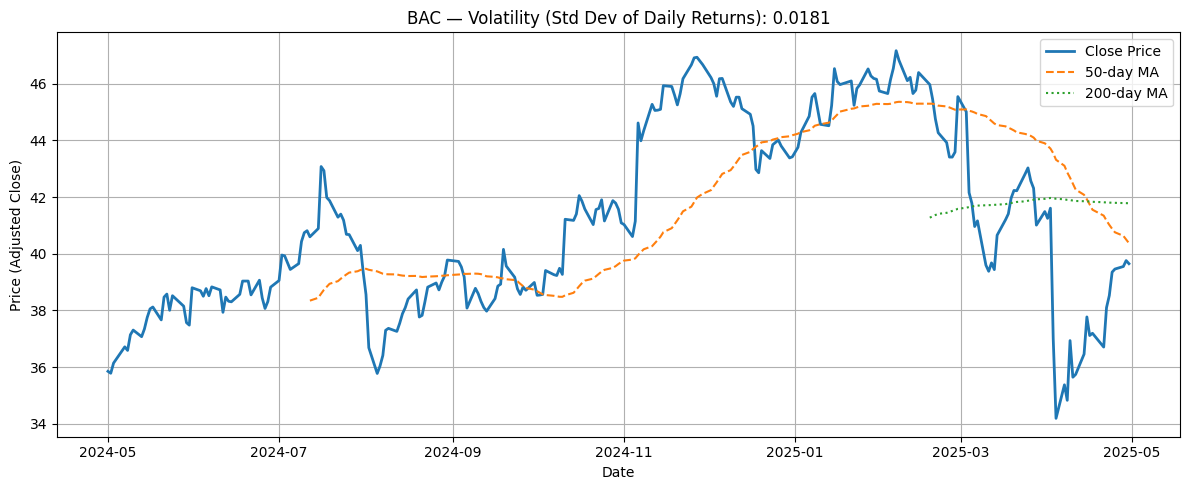

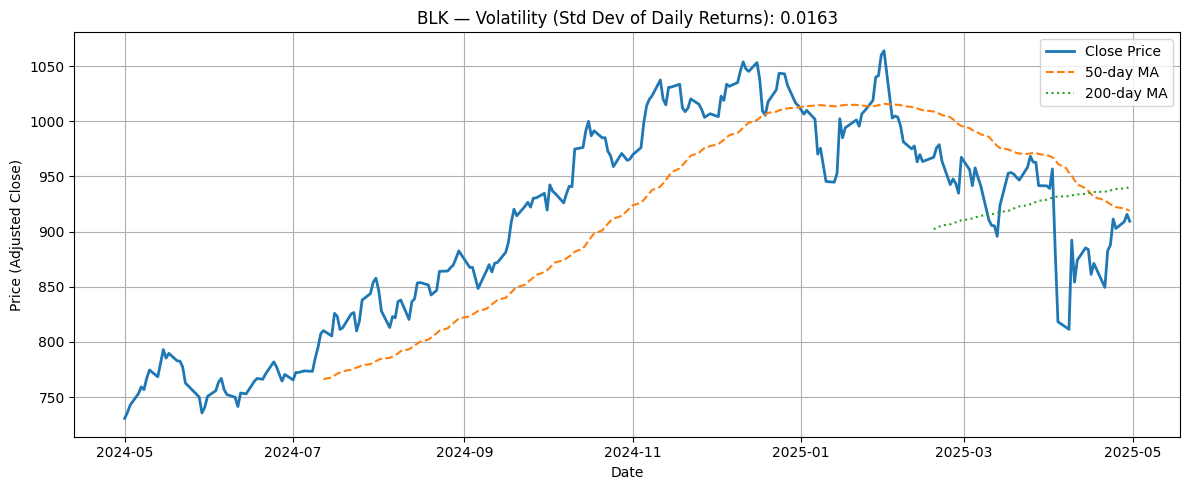

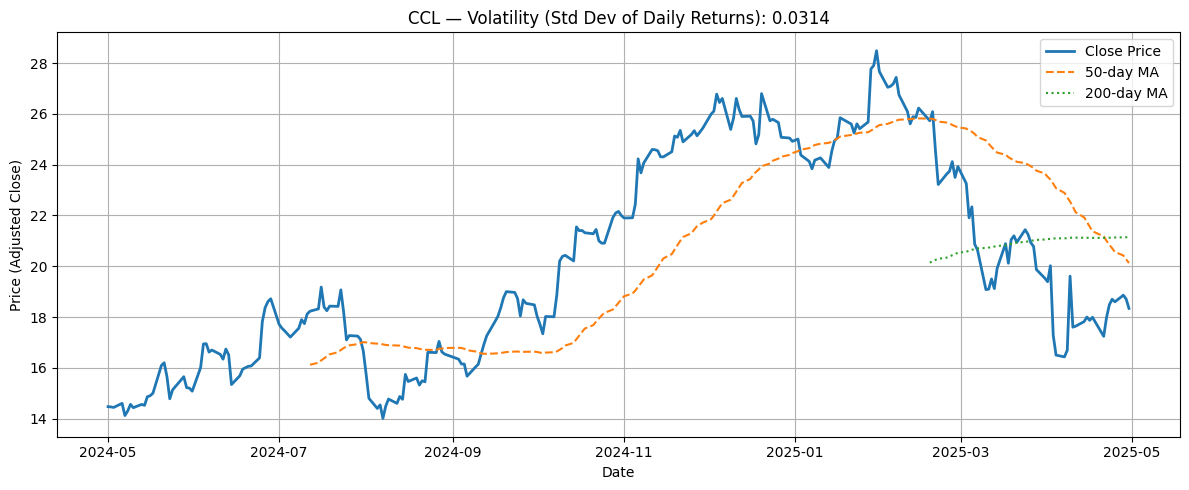

In [17]:
# CODE HERE
# Use as many coding cells as you need

# Compute the volatility of every stock in the S&P 500 
# Compute daily returns for each stock
# Calculate daily returns for all stocks
daily_returns = df_close.pct_change(fill_method=None)

# Calculate volatility as the standard deviation of daily returns for each stock
volatility = daily_returns.std()

# Get the tickers from death crosses, sorted alphabetically, limited to first 10
death_tickers = sorted(df_death_unique['Ticker'].tolist())[:10]

# Plot for each ticker: closing price + 50-day and 200-day MA + volatility in title
for ticker in death_tickers:
    plt.figure(figsize=(12, 5))
    
    # Plot closing price
    plt.plot(df_close.index, df_close[ticker], label='Close Price', linewidth=2)
    
    # Plot 50-day and 200-day moving averages
    plt.plot(df_ma50.index, df_ma50[ticker], label='50-day MA', linestyle='--')
    plt.plot(df_ma200.index, df_ma200[ticker], label='200-day MA', linestyle=':')
    
    # Plot title with ticker and volatility
    vol_value = volatility.get(ticker, float('nan'))
    plt.title(f"{ticker} — Volatility (Std Dev of Daily Returns): {vol_value:.4f}")
    
    plt.xlabel("Date")
    plt.ylabel("Price (Adjusted Close)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#### Plot top 10 stocks that had Golden Crosses in the last 14 days

- You should have 10 plots (use a for loop) for every stock in the top 10 (in alphabetical order)
- For each plot, put the volatility of the stock in the title of the plot

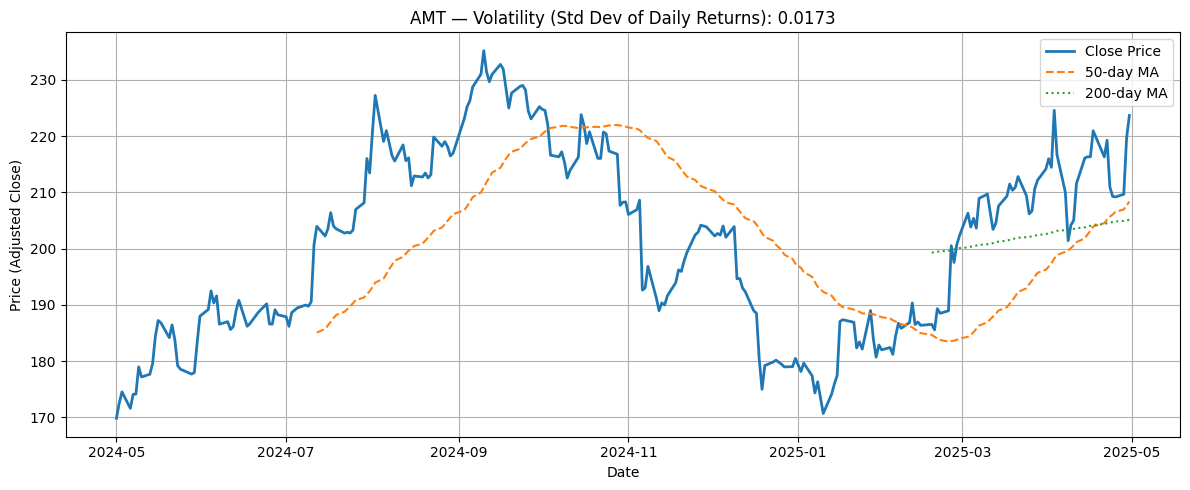

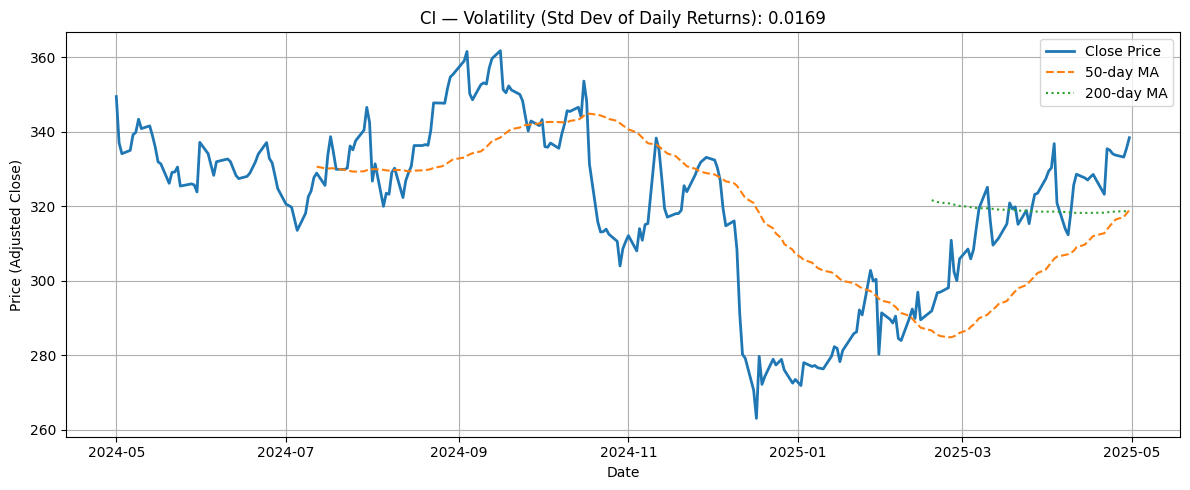

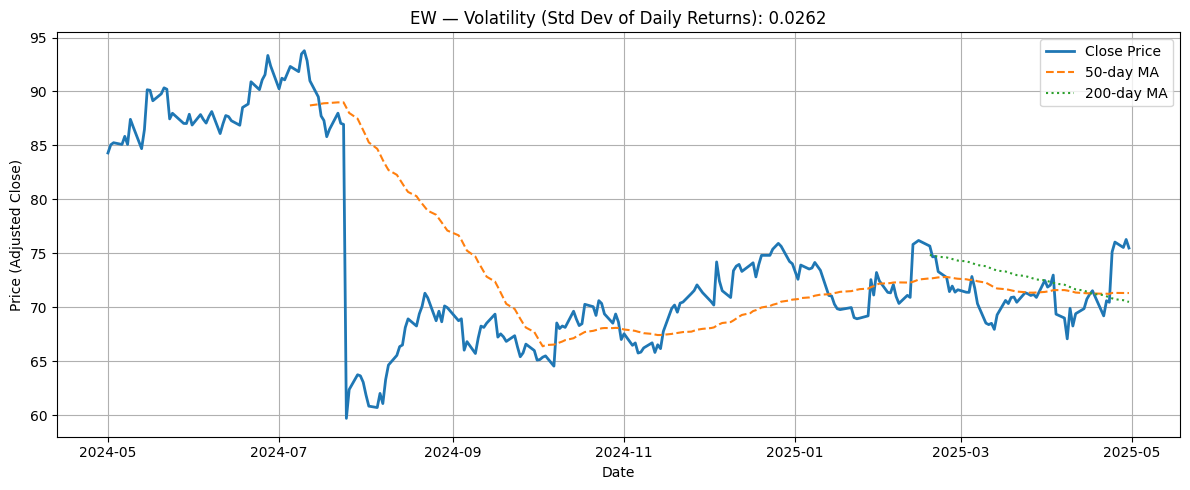

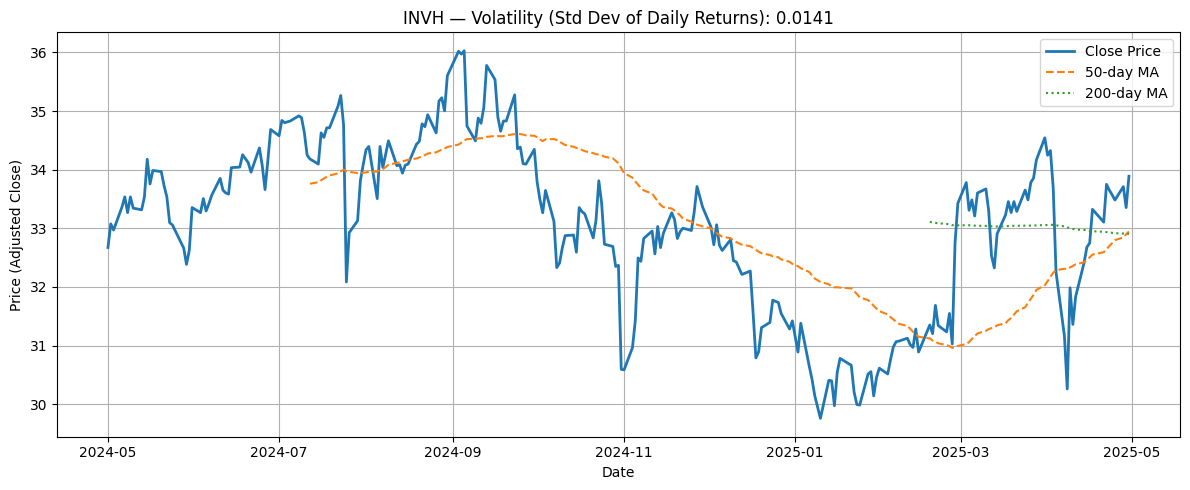

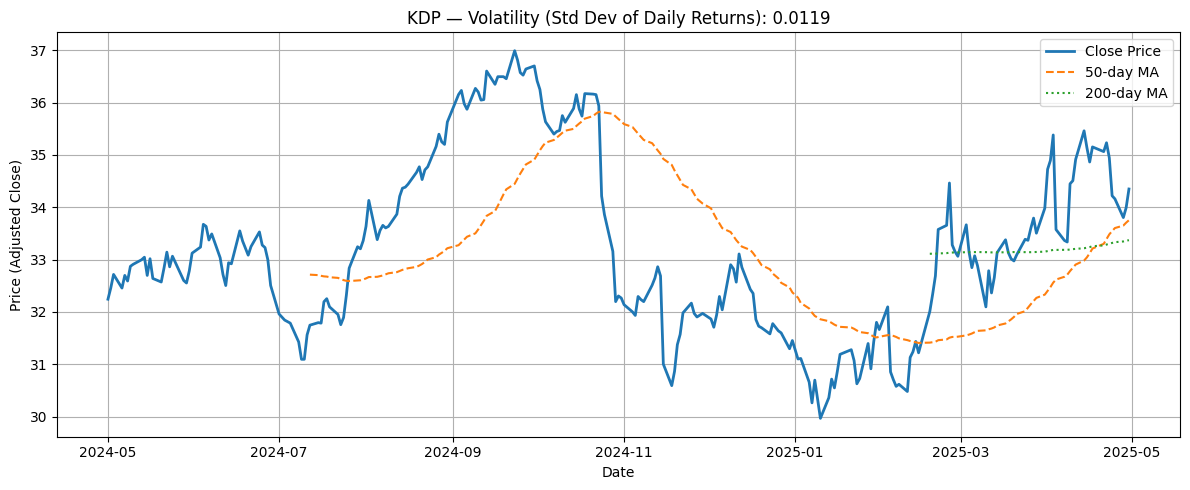

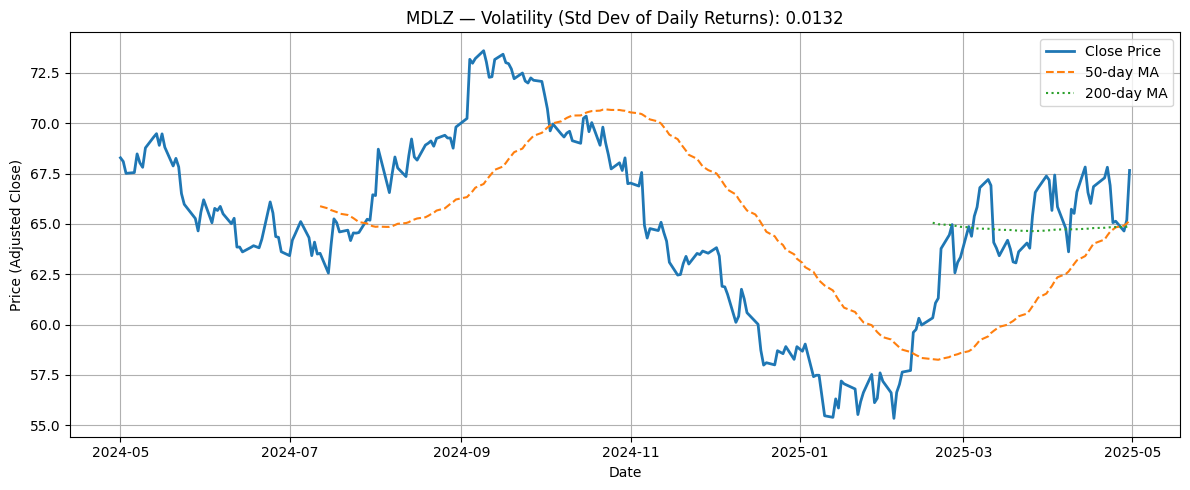

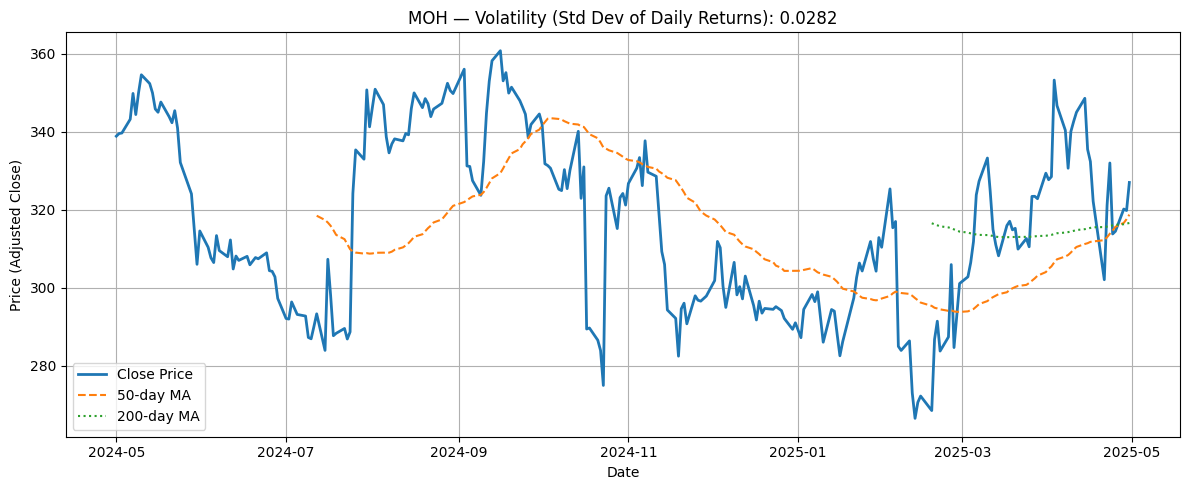

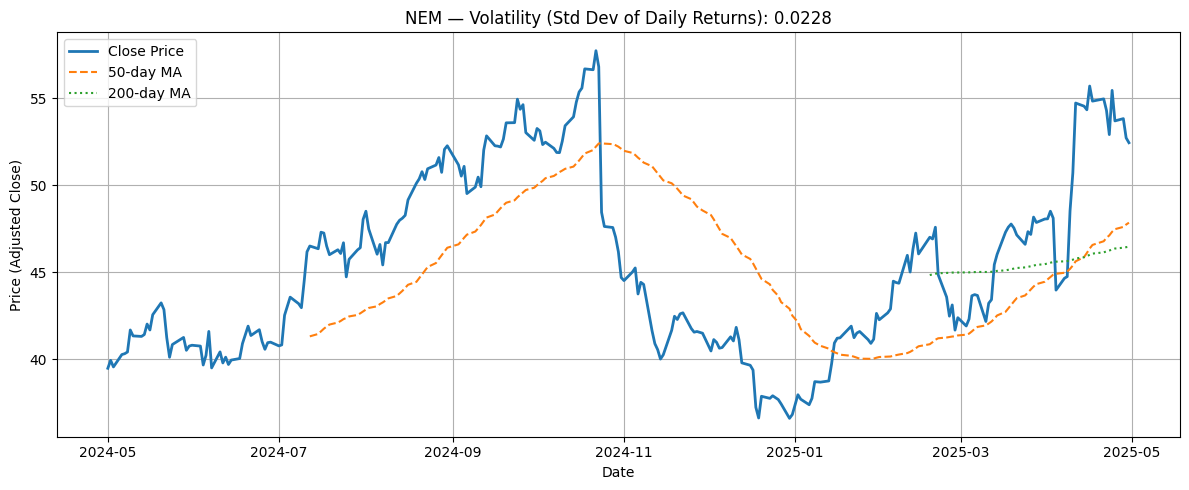

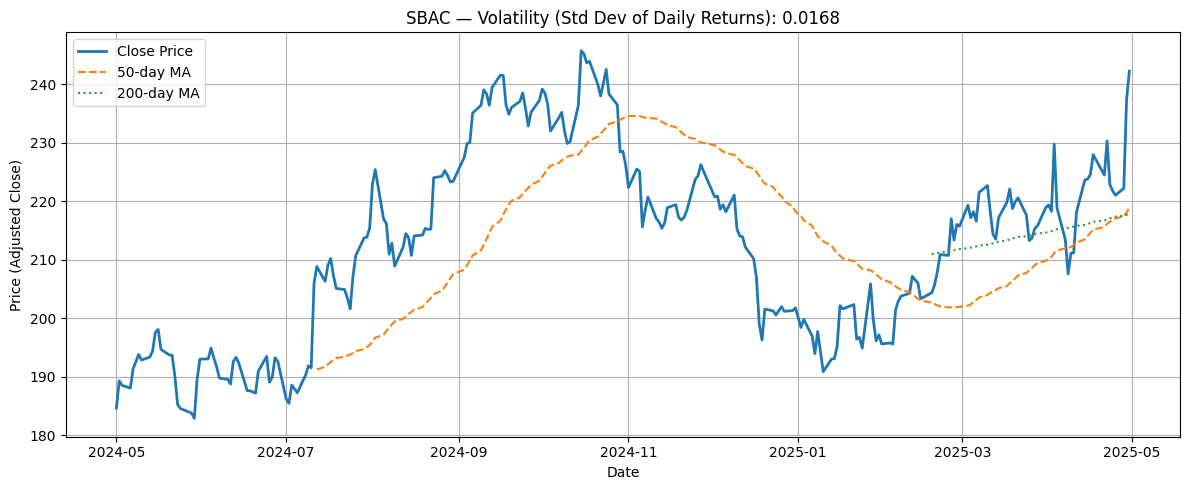

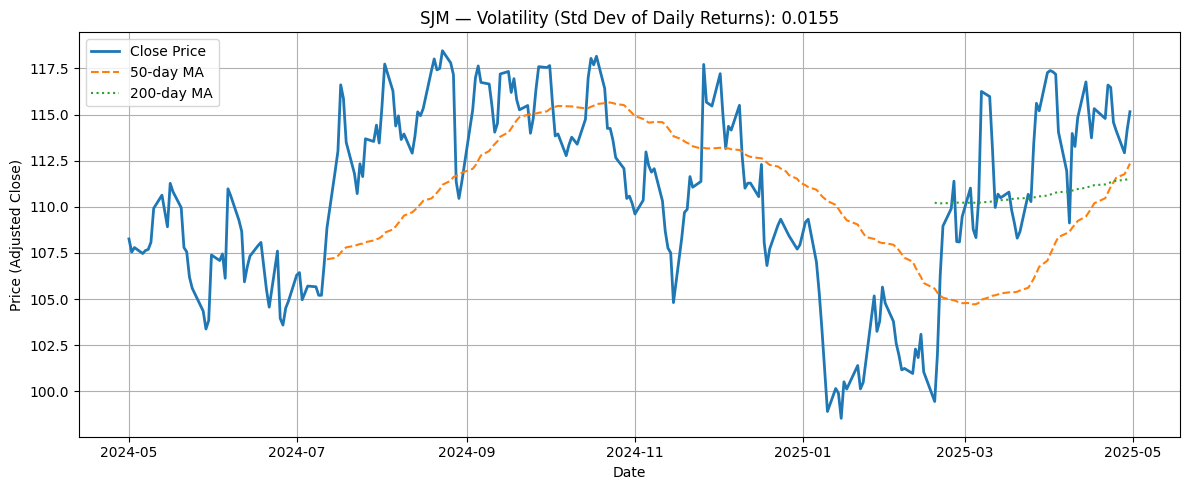

In [19]:
# CODE HERE
# Visualize the results here
# Calculate daily returns (if not already done)
daily_returns = df_close.pct_change(fill_method=None)

# Calculate volatility (std dev of daily returns)
volatility = daily_returns.std()

# Get top 10 Golden Cross tickers in alphabetical order
golden_tickers = sorted(df_golden_cross_14d['Ticker'].unique())[:10]

# Plot each ticker with close price, MAs, and volatility in title
for ticker in golden_tickers:
    plt.figure(figsize=(12, 5))
    
    # Plot close price
    plt.plot(df_close.index, df_close[ticker], label='Close Price', linewidth=2)
    
    # Plot 50-day moving average
    plt.plot(df_ma50.index, df_ma50[ticker], label='50-day MA', linestyle='--')
    
    # Plot 200-day moving average
    plt.plot(df_ma200.index, df_ma200[ticker], label='200-day MA', linestyle=':')
    
    # Get volatility value for the ticker
    vol_value = volatility.get(ticker, float('nan'))
    
    # Title with ticker and volatility
    plt.title(f"{ticker} — Volatility (Std Dev of Daily Returns): {vol_value:.4f}")
    
    plt.xlabel('Date')
    plt.ylabel('Price (Adjusted Close)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Plot top 10 stocks that had Death Crosses in the last 14 days

You should have 10 plots (use a for loop) for every stock in the top 10 (in alphabetical order)
For each plot, put the volatility of the stock in the title of the plot

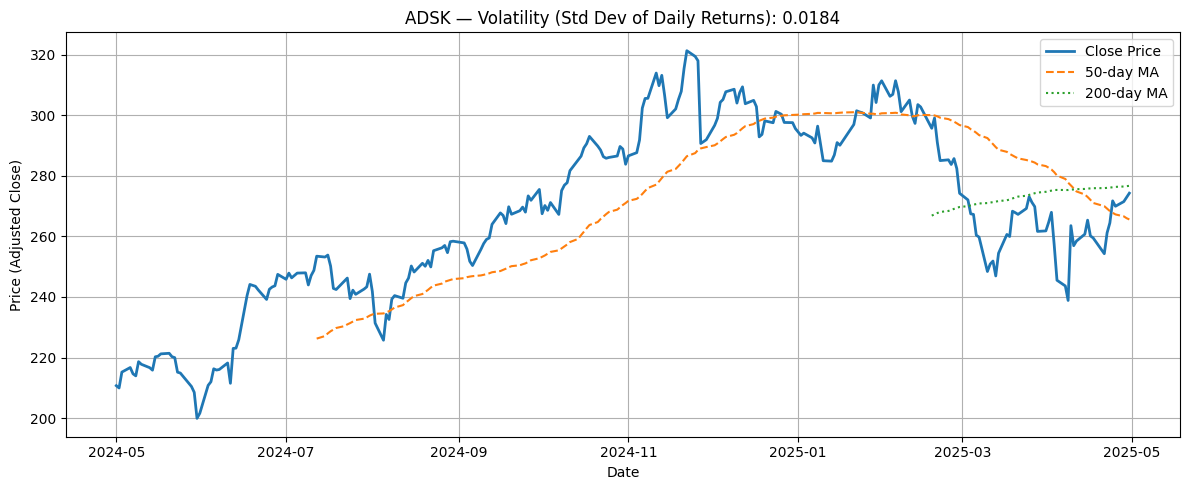

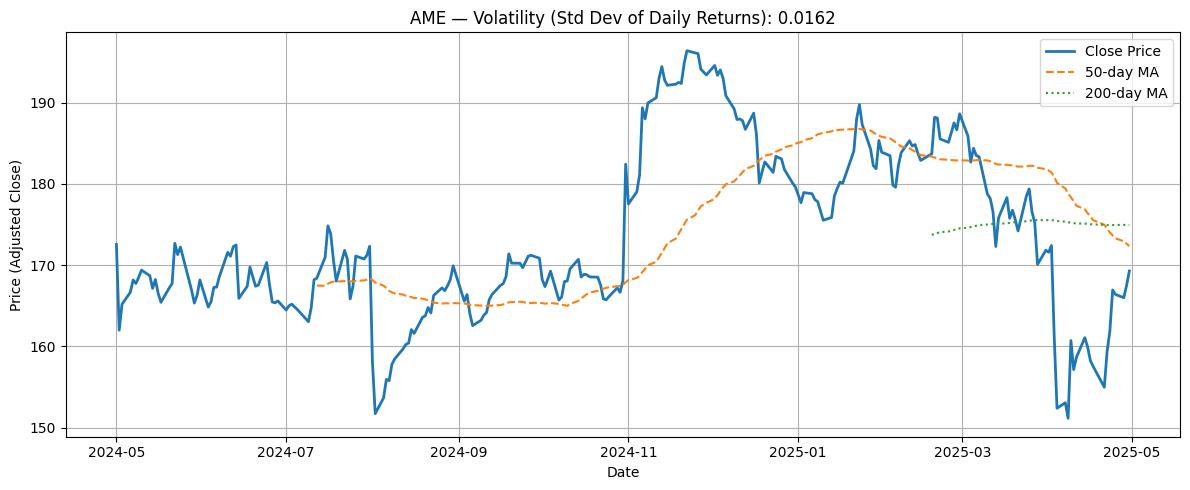

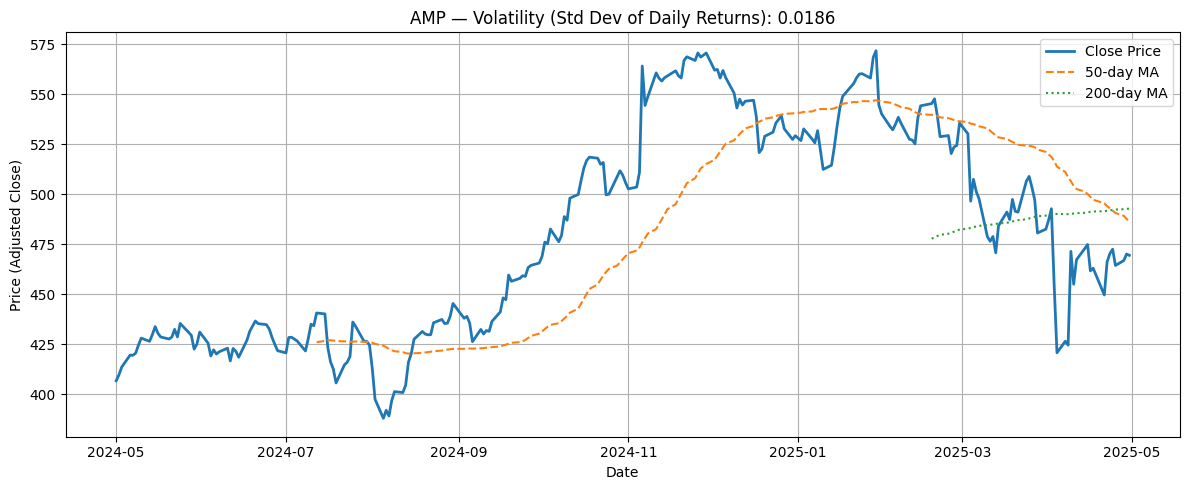

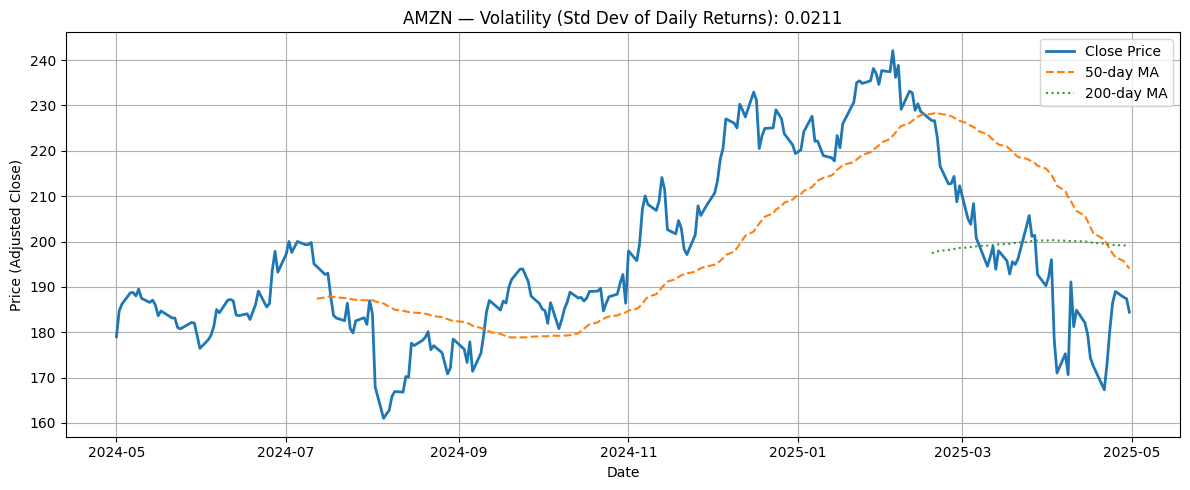

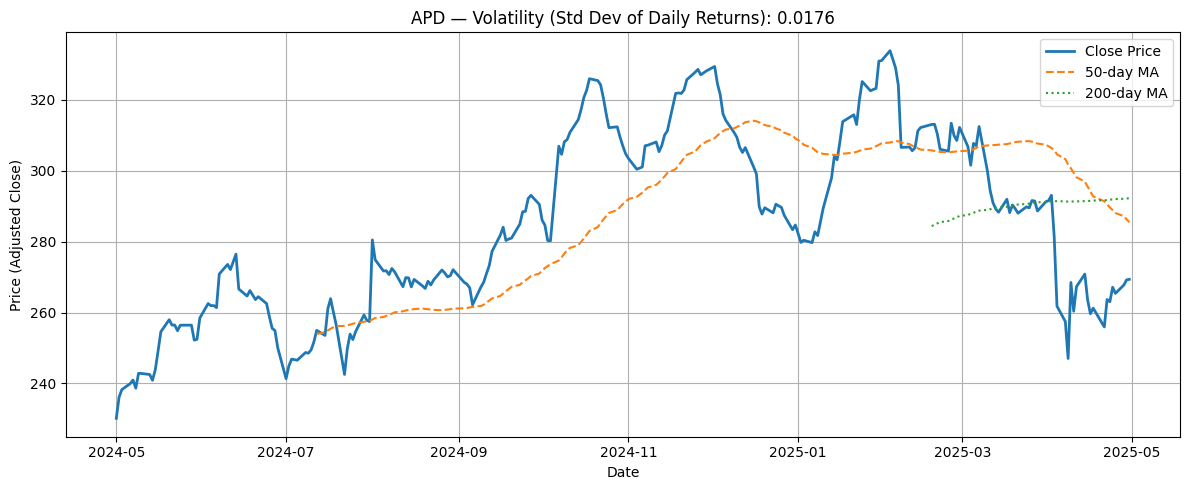

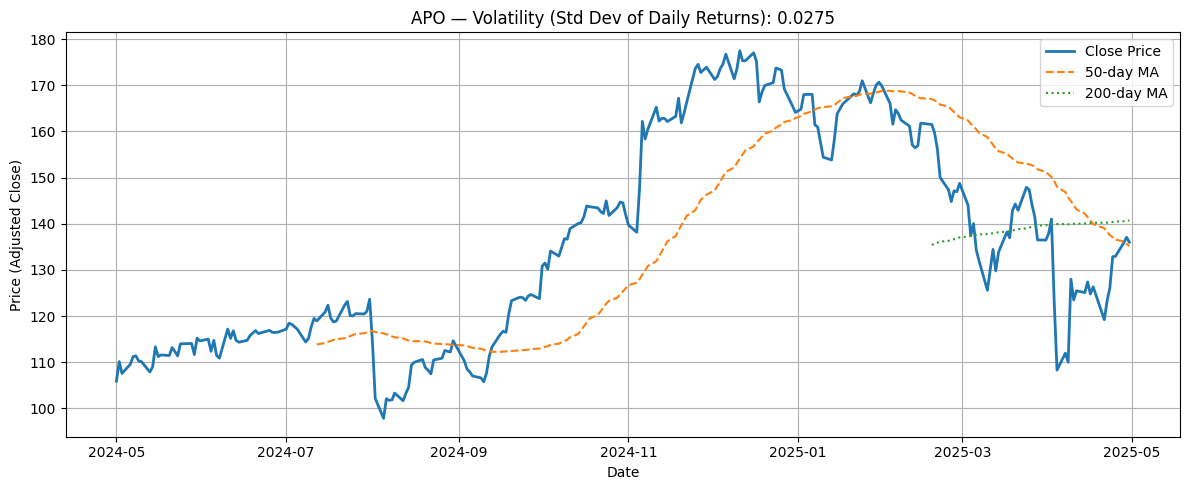

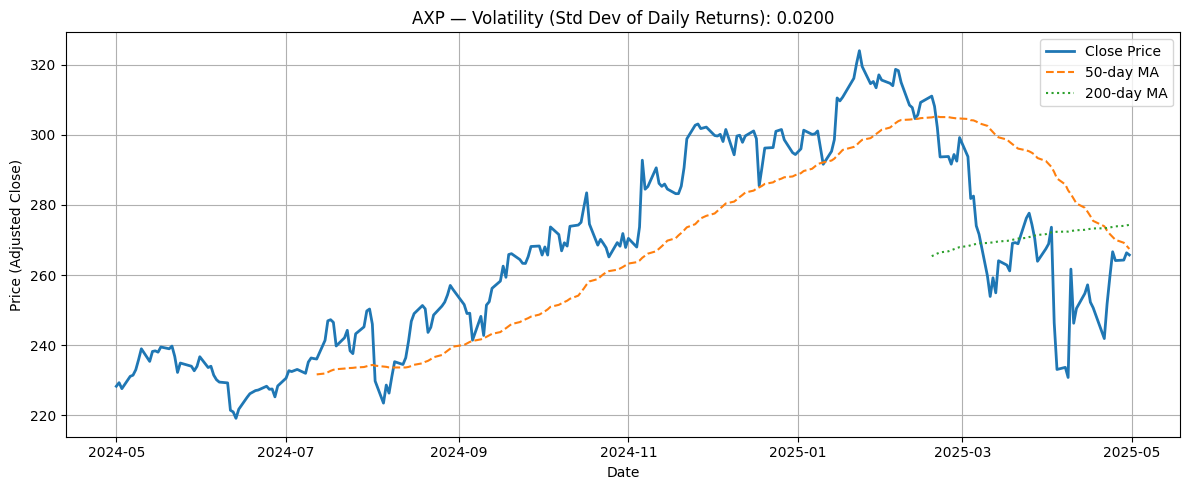

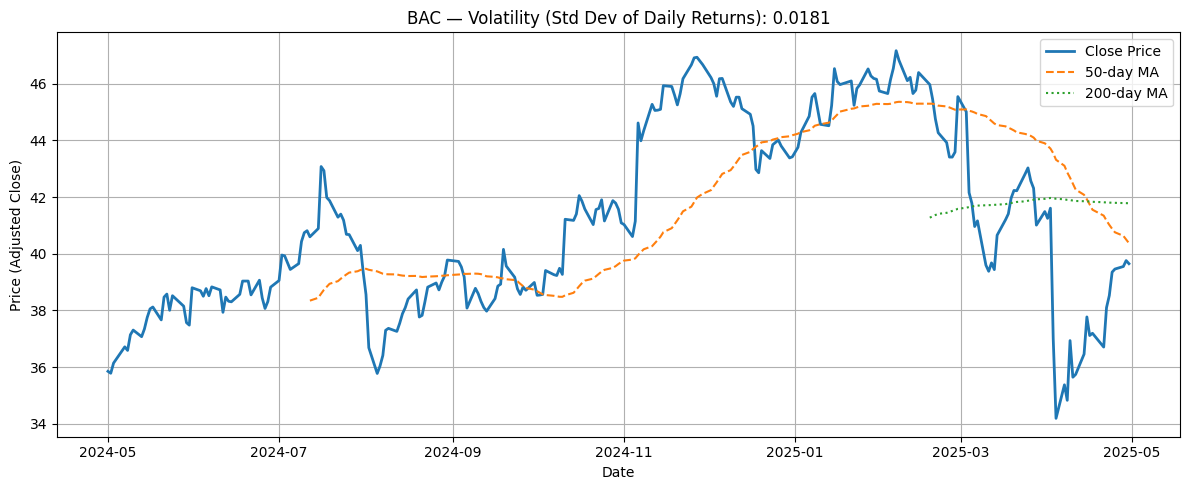

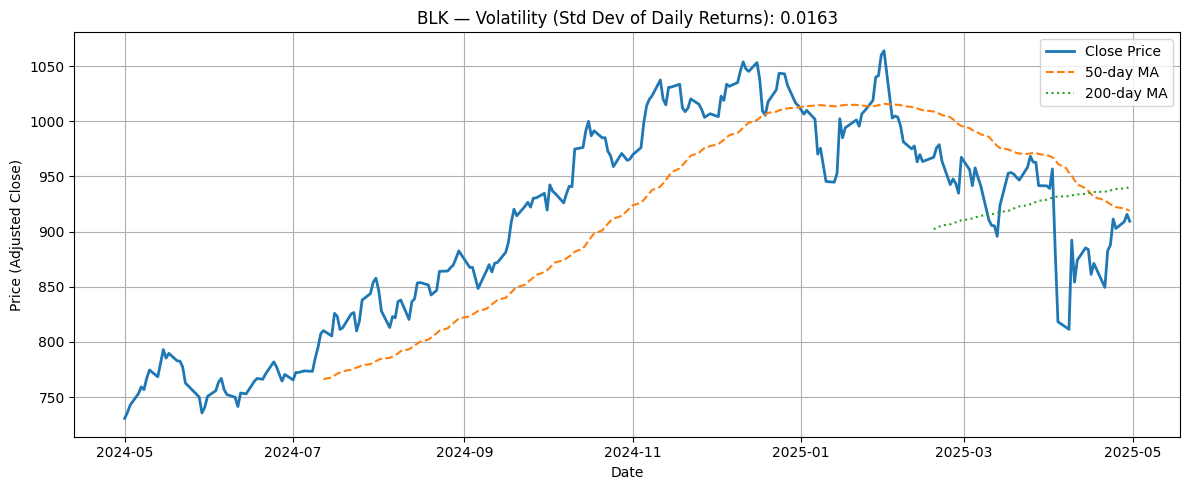

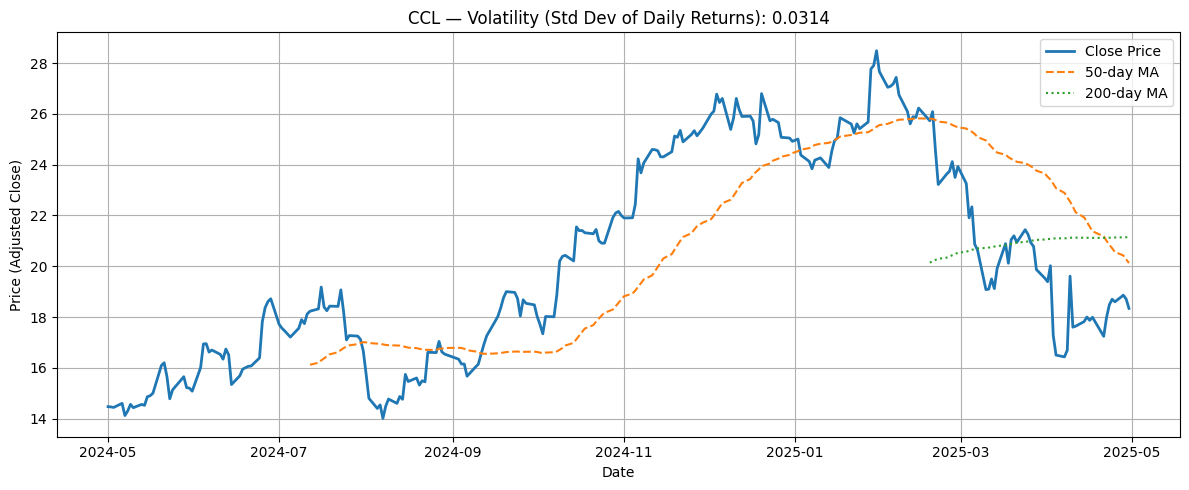

In [20]:
# CODE HERE
# Visualize the results here
# Calculate daily returns with fill_method=None to avoid warnings
daily_returns = df_close.pct_change(fill_method=None)

# Calculate volatility (standard deviation of daily returns)
volatility = daily_returns.std()

# Get top 10 unique Death Cross tickers, sorted alphabetically
death_tickers = sorted(df_death_cross_14d['Ticker'].unique())[:10]

# Loop over each ticker and plot
for ticker in death_tickers:
    plt.figure(figsize=(12, 5))
    
    # Plot closing price
    plt.plot(df_close.index, df_close[ticker], label='Close Price', linewidth=2)
    
    # Plot 50-day moving average (MA50)
    plt.plot(df_ma50.index, df_ma50[ticker], label='50-day MA', linestyle='--')
    
    # Plot 200-day moving average (MA200)
    plt.plot(df_ma200.index, df_ma200[ticker], label='200-day MA', linestyle=':')
    
    # Get volatility for the ticker
    vol_value = volatility.get(ticker, float('nan'))
    
    # Title with ticker and volatility
    plt.title(f"{ticker} — Volatility (Std Dev of Daily Returns): {vol_value:.4f}")
    
    plt.xlabel('Date')
    plt.ylabel('Price (Adjusted Close)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Question section

### Understanding concepts

#### What is a Golden Cross and what does it typically signal to investors?

A **Golden Cross** occurs when a stock’s 50-day moving average (MA50) crosses above its 200-day moving average (MA200) on a price chart. This event is generally interpreted as a potential shift from a bearish to a bullish trend, suggesting that recent price momentum is overtaking the longer-term trend.

Many investors consider the Golden Cross a bullish signal, as it may indicate the beginning of an upward trend and is often used as a trigger for long positions. However, it is important to note that the Golden Cross is not always a reliable standalone indicator. False signals can occur, particularly in volatile or sideways markets. Therefore, analysts often look for confirmation through additional factors such as increased trading volume, broader market trends, and macroeconomic conditions.


**It's time to buy - Many see it as a bullish signal indicating the stock could start an upward trend.**



#### What is a Death Cross and how might market participants react to it?

A death cross is when a stock's 50-day moving average crosses below its 200-day moving average on a chart. It's basically the opposite of a golden cross.

The stock might be switching from going up to going down - like a bearish trend starting. It shows that recent selling pressure is getting stronger than the long-term trend, which usually means trouble ahead.

**Selling pressure - Many investors see this as a signal to sell or avoid buying the stock.
Short-selling opportunities - Traders might bet against the stock, expecting it to keep falling.**


#### Why might moving averages (MA50, MA200) be used as indicators in technical analysis?

Moving averages such as the 50-day (MA50) and 200-day (MA200) are widely used in technical analysis due to their ability to smooth out short-term fluctuations and reveal the underlying direction of a stock’s price trend.

Stock prices often exhibit high volatility, influenced by news, investor sentiment, and short-term market activity. Simple moving averages mitigate this noise by calculating the average closing price over a defined period—50 days for MA50 and 200 days for MA200—thus producing smoother lines that represent more stable trends.

The MA50 is commonly interpreted as a measure of intermediate-term momentum, while the MA200 reflects the longer-term trend. The interaction between these two indicators, or the position of the current price relative to them, is frequently used to generate trading signals. For instance, when the MA50 crosses above the MA200 (a “Golden Cross”), it may signal a potential bullish trend. Conversely, a cross below (a “Death Cross”) may suggest a bearish outlook.

These moving averages also serve as psychological benchmarks for market participants. The MA200, in particular, often acts as a dynamic level of support or resistance, as many institutional investors and algorithmic strategies incorporate it into their models. This widespread attention can make these levels self-reinforcing.

Furthermore, moving averages are relatively simple to interpret compared to more complex technical indicators. Visual inspection of whether a stock's price is above or below its moving averages can provide an immediate assessment of trend strength and direction.

The selection of the 50-day and 200-day windows aligns with conventional timeframes in financial reporting and investor behavior. The 50-day moving average approximates a fiscal quarter, while the 200-day moving average covers most of a calendar year, thereby linking technical analysis with familiar business cycles.

Despite their utility, moving averages are inherently lagging indicators—they reflect past price movements and do not predict future events. However, this characteristic also contributes to their reliability, as they confirm established trends rather than reacting prematurely to market noise.


#### Why are the last 14 days used to check for crosses? What are the implications of this choice?

The choice of a 14-day lookback period for identifying moving average crosses represents a practical compromise between responsiveness and reliability.

Using a very short window, such as 2 or 3 days, would likely produce excessive noise, resulting in frequent false signals. In such cases, minor fluctuations in price could cause the moving averages to intersect frequently without indicating genuine trend changes. This would increase the likelihood of misinterpretation and lead to inefficient or premature trading decisions.

Conversely, extending the lookback period to 30 or 60 days may provide stronger confirmation of trend reversals but at the cost of timeliness. By the time a crossover is validated over such a long window, the significant portion of the trend movement may have already occurred, potentially reducing profit opportunities.

A 14-day window offers a balanced middle ground. It provides enough historical context to reduce random noise and false positives while still being responsive enough to detect meaningful trend shifts relatively early. This period roughly corresponds to two weeks of trading activity, which is commonly seen as sufficient to confirm whether a crossover represents a sustained trend or merely a short-term fluctuation.

The implications of this choice are significant. While it improves the balance between signal reliability and timeliness, it still involves trade-offs: occasional false positives and a potential delay in recognizing the very beginning of a trend. Moreover, the optimal lookback period may vary depending on the trader’s strategy. Short-term traders might favor shorter confirmation windows for faster reactions, even if they are less reliable. In contrast, long-term investors might prefer longer periods to prioritize signal stability over immediacy.

In summary, the 14-day lookback period is widely adopted because it effectively balances sensitivity and stability, aligning with the risk tolerance and time horizons of a broad range of trading strategies.



#### How does volatility (e.g., measured using percentage change standard deviation) help contextualize the price movement around crosses?

Volatility plays a key role in how technical signals like moving average crosses should be interpreted. It reflects the typical magnitude of a stock's price fluctuations and directly impacts the reliability of those signals.

For instance, if a stock is usually very stable—rarely moving more than 1% per day—but suddenly experiences a 5% jump around a golden cross, that movement could be considered significant. In contrast, if a stock regularly swings by 8% daily, a 5% move may fall within its normal range and therefore be less meaningful.

The standard deviation of returns is a common way to quantify volatility. In highly volatile stocks, moving averages tend to fluctuate frequently, which can generate numerous false signals or “fake crosses.” These occur because the price often crosses above or below the moving average due to noise rather than a sustained trend.

For lower-volatility stocks, moving average crosses tend to be more reliable. Because these stocks move more steadily, a crossover generally reflects a meaningful shift in investor sentiment or buying activity.

Volatility also influences trading strategy. High-volatility stocks may require wider stop losses and smaller position sizes due to their unpredictable movements, while low-volatility stocks may allow for more confident and aggressive trades.

In summary, volatility helps differentiate between true signals and random noise. High volatility introduces more uncertainty and reduces the reliability of technical indicators, while low volatility often results in cleaner, more trustworthy signals.


### Backtesting and evaluation

#### How would you measure whether Golden Crosses actually lead to profitable trades?

To evaluate whether Golden Cross patterns lead to consistently profitable trades, one would begin by analyzing several years of historical stock data to identify all instances where the 50-day moving average (MA50) crosses above the 200-day moving average (MA200). Each occurrence would then be treated as a potential buy signal, followed by simulating trade outcomes over various holding periods (e.g., 1 month, 3 months, or 12 months).

A critical aspect of such a backtest is defining the exit strategy. The chosen rule—such as exiting after a fixed number of days or upon the occurrence of a Death Cross (when the MA50 falls below the MA200)—can significantly affect the results.

For each trade, key performance metrics would be calculated, including:

* **Return per trade**
* **Win rate (percentage of profitable trades)**
* **Average gain on winning trades**
* **Average loss on losing trades**
* **Net profitability**

These results should also be compared against a baseline strategy, such as buy-and-hold, to assess whether the active trading based on Golden Cross signals adds meaningful value.

Practical trading considerations—such as transaction fees, slippage, and market liquidity—must also be incorporated to reflect realistic conditions. Additionally, it may be valuable to segment the analysis by stock type (e.g., large-cap vs. small-cap) or market regime (e.g., bull vs. bear markets), as the strategy’s effectiveness may vary depending on these factors.

Ultimately, the core question is whether a strategy based on Golden Cross signals can consistently outperform passive benchmarks like the S\&P 500, after accounting for costs and risk. Empirical studies suggest that while Golden Cross signals may appear promising in hindsight, their forward-looking effectiveness is mixed and often insufficient to outperform simple long-term investing strategies on a risk-adjusted basis.


#### What are the risks of using only technical indicators like moving averages without incorporating fundamentals?

Relying solely on technical indicators such as moving averages, without incorporating a company’s fundamentals, carries several important risks.

One major risk is the potential for misleading signals. For example, a moving average might suggest a buy signal (like a golden cross), even if the company is facing serious financial difficulties. Technical indicators are based purely on past price behavior and do not account for critical factors like revenue, debt levels, management quality, or competitive advantage.

In addition, moving averages are lagging indicators, meaning they react to changes only after they have already occurred. This can be problematic in situations where there are sudden negative news events or macroeconomic shifts, as these indicators provide no early warnings or context for price movements.

Another risk is the lack of a long-term perspective. Technical analysis might indicate a short-term downtrend, while fundamental analysis could reveal strong long-term growth potential. Ignoring this can lead to premature or poorly informed decisions.

Lastly, technical indicators alone do not account for external factors such as monetary policy, regulatory changes, or geopolitical events, all of which can significantly influence stock prices.

#### How would you improve this strategy to reduce false signals (e.g., a Golden Cross that doesn’t lead to a price increase)?

One way to reduce false golden cross signals is to introduce confirmation layers. For example, requiring a spike in trading volume on the crossover day can indicate stronger market conviction behind the move.

The broader market context also matters—golden crosses that occur during overall bullish conditions or when major indices are rising tend to be more reliable.

Adding other technical indicators can strengthen signal quality. The Relative Strength Index (RSI) helps gauge whether a stock is overbought or oversold, while the Moving Average Convergence Divergence (MACD) tracks momentum shifts through the relationship between short- and long-term moving averages. If these indicators align positively with the golden cross, the signal is more robust.

Another improvement involves entry timing. Waiting for a short-term pullback and confirming that the price holds above a key support level (like the 200-day average) before entering can reduce the risk of acting on a short-lived spike.

Finally, backtesting the strategy with stricter entry and exit criteria—such as combining technical filters with time-based rules—can help identify patterns that consistently improve performance and minimize false positives.

### AI Integration


#### Could sentiment from news (future project part) help validate or invalidate these technical signals?

Sentiment from news could definitely help validate or even contradict technical signals like the golden cross. A crossover might look bullish on the chart, but if recent headlines are negative—like bad earnings, lawsuits, or sector-wide problems—that could be a sign the signal is misleading.

On the flip side, if a golden cross shows up and there’s also a wave of positive news (new partnerships, upgrades from analysts, strong earnings), that kind of sentiment can reinforce the idea that the stock’s momentum is real and not just a random blip.

It’s also useful during uncertain signals. For example, if the technicals say "buy" but the sentiment is mixed or negative, it’s a clue to maybe wait or reduce risk. Basically, sentiment can act as a second layer of confirmation (or warning) on top of the chart.

In a more advanced setup, you could even combine them in a strategy—like only trading golden crosses when news sentiment is positive over the last few days. That could help filter out the weak signals and focus on the ones more likely to work.

So yeah, while technical signals show what’s happening in price trends, sentiment gives context for *why* those trends might or might not hold. Combining both gives a more complete picture.


### Critical thinking

#### From a trading perspective, is this strategy actionable on its own?

From a trading perspective, the golden cross strategy reflects a bullish momentum shift—where the 50-day moving average crosses above the 200-day moving average. It signals that recent price trends are gaining strength, which many interpret as a potential start of a longer-term uptrend.

However, since both moving averages are lagging indicators, the signal often arrives after a large part of the move has already occurred. In volatile or sideways markets, it may produce false positives—where the crossover happens, but the price quickly reverses.

To improve its reliability, traders usually combine it with other technical tools. The **RSI (Relative Strength Index)** helps determine whether the stock is overbought or oversold at the moment of the crossover, while the **MACD (Moving Average Convergence Divergence)** can confirm whether bullish momentum is building. A rise in trading volume during the crossover adds further credibility.

In isolation, the golden cross has limited predictive power. Its strength increases when aligned with other indicators and broader market context.


#### Based on the volatility observed post-Golden Cross, do these crosses consistently predict upward movement?

The Golden Cross, where the 50-day moving average crosses above the 200-day moving average, is often seen as a bullish indicator. However, based on the analysis of three stocks (ADSK, AME, and AMP), this signal did not consistently predict sustained upward movements.

**ADSK**

In late 2024, ADSK experienced a Golden Cross followed by a short-term increase in price. However, in early 2025, the stock price dropped significantly. Volatility was moderate (0.0184), and the upward trend did not hold.

**AME**

AME also showed a Golden Cross around late 2024. After a brief increase, the price began to decline steadily. Volatility was lower (0.0162), but the pattern still failed to confirm a strong bullish trend.

**AMP**

For AMP, the Golden Cross occurred before the first quarter of 2025. The stock price rose briefly but then dropped sharply. It had the highest volatility among the three (0.0186), and again, the expected upward movement did not last.

**Conclusion:**

Although the Golden Cross is a widely used technical signal, in these three cases it did not reliably predict long-term upward trends. Each stock saw an initial rise followed by a decline, often with elevated volatility. This suggests that the Golden Cross alone may not be a sufficient indicator for making investment decisions and should be complemented with other analysis tools.




#### If you had to present this analysis to a portfolio manager, what conclusions would you emphasize? What caveats would you include?

If I were to present this analysis to a portfolio manager, I would emphasize that while the Golden Cross is traditionally viewed as a bullish signal, **it did not consistently predict sustained upward trends** in the examples analyzed. In all three cases (ADSK, AME, AMP), there were **short-term price increases followed by declines**, often accompanied by **elevated volatility**, suggesting market uncertainty after the signal.

However, I would also highlight several important caveats. First, the analysis is limited to a small sample of three stocks, so it may not reflect broader market behavior. Second, technical indicators like the Golden Cross are **lagging** by nature and may be slow to react in fast-changing market conditions. Lastly, **external events or company-specific news** may have influenced the outcomes independently of the crossover signal, making it hard to isolate its effect.

In summary, I would recommend using the Golden Cross as part of a broader analytical framework rather than a standalone signal for investment decisions.

Conclusions in 2 bullet points:

**Conclusion**
* The Golden Cross did not consistently lead to sustained upward trends across ADSK, AME, and AMP; all showed short-term gains followed by significant declines.
* Elevated post-cross volatility suggests that the market's reaction to the signal was unstable and short-lived.





Caveats in 2 or 3 bullet points: 


**Caveats**

* The analysis is based on only three stocks, so conclusions may not generalize across the broader market.
* External factors (e.g., macroeconomic events or earnings reports) may have influenced price movements independently of the technical signals.
* Moving average crossovers are lagging indicators and may react too slowly in volatile environments.
